# House Price 

### Kaggle Competition
### Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  # Replace None with a specific number if needed
pd.set_option('display.max_rows', None)  # Replace None with a specific number if needed
pd.set_option('display.width', 275)  # Replace None with a specific number if needed
# Load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# print the first 5 rows of the dataframe
print(df_train.head(2))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC Cen

In [47]:

# describe the dataframe
print(df_train.describe())



                Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068   
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.7053

In [48]:
# print the shape of the dataframe
print(df_train.shape)


(1460, 81)


### Handle missing value 

In [49]:
# drop all columns with missing values more than 100
countNullTrain = df_train.isnull().sum()
countNull = df_test.isnull().sum()
df_train = df_train.drop(countNullTrain[countNullTrain > 100].index, axis=1)
df_test = df_test.drop(countNull[countNull > 100].index, axis=1)

# fill the missing values with the mean of the column
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


### Analyze the numerical columns and categorical columns

   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0   1          60     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8   
1   2          20     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0       

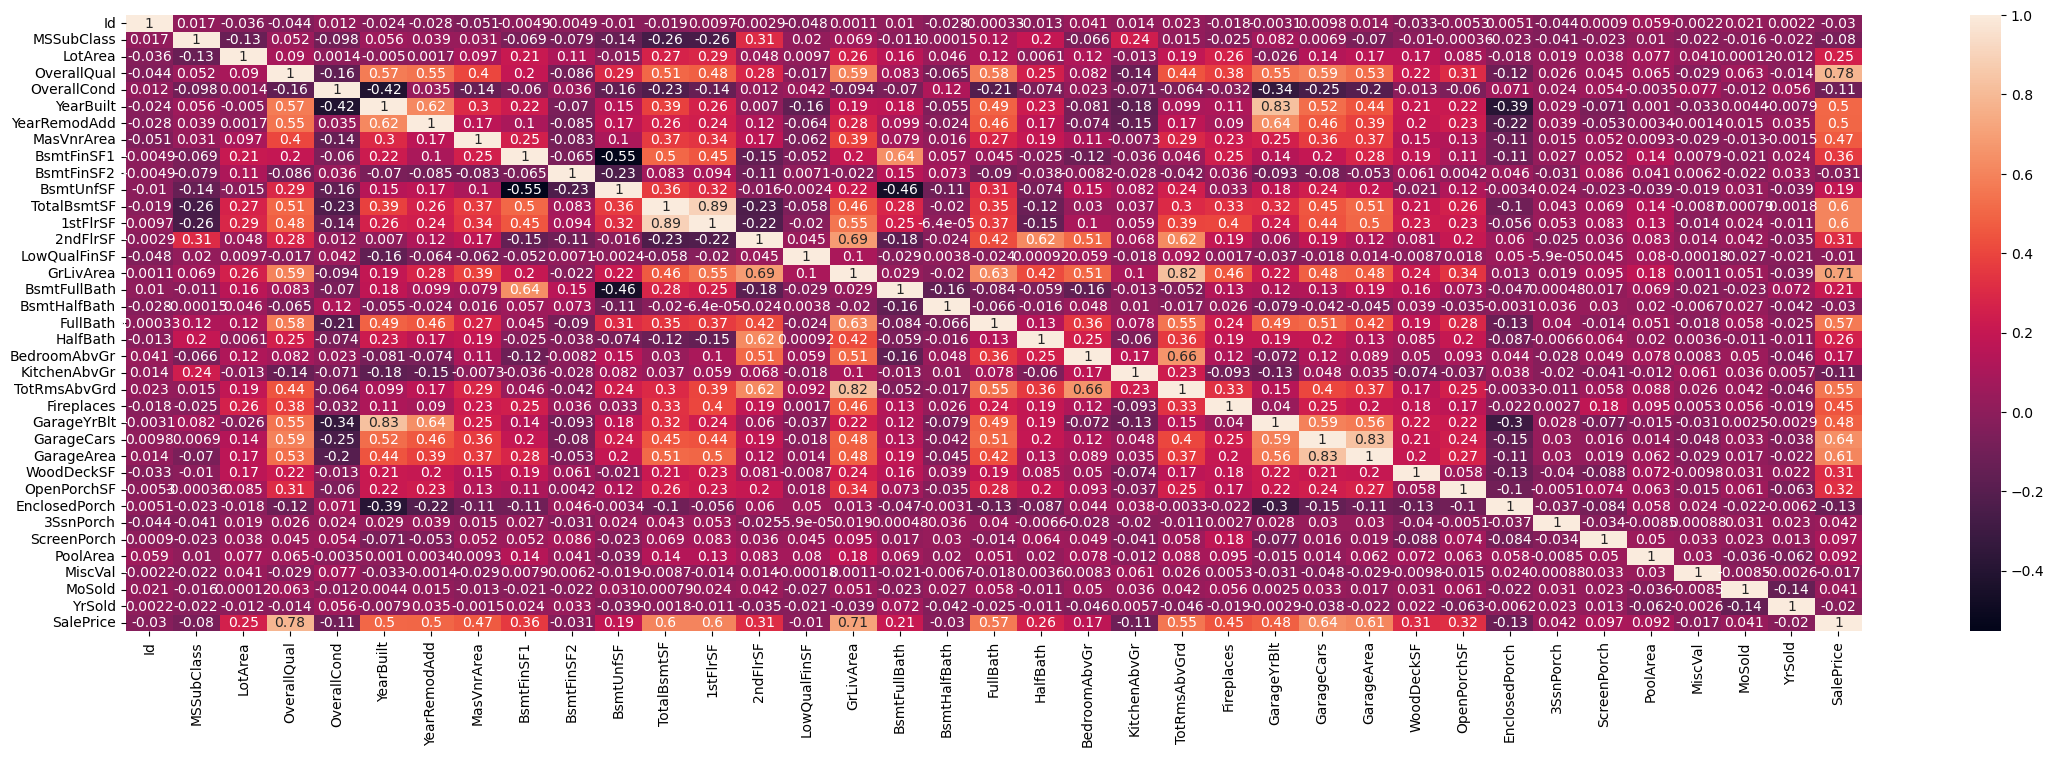

In [50]:
# Get the numeric columns
numericals = df_train.select_dtypes(include=[np.number])

print(numericals.head(2))
# Get the categorical columns
categoricals = df_train.select_dtypes(exclude=[np.number])

# correlation matrix
correlation_matrix = numericals.corr()

# plot the correlation matrix
plt.figure(figsize=(28, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [51]:
top_numeric = correlation_matrix['SalePrice'].sort_values(ascending=False)[1:11]
top_numeric = top_numeric.keys().tolist()
print(top_numeric)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


### Encode the categorical data and select top 10

In [52]:
# Get target variable
Y = df_train['SalePrice']
df_train = df_train.drop('SalePrice', axis=1)

# get dummies for the categorical columns
onehot_train = pd.get_dummies(df_train[categoricals.columns], drop_first=True)
onehot_test = pd.get_dummies(df_test[categoricals.columns], drop_first=True)	

# drop the categorical columns
df_train = df_train.drop(categoricals.columns, axis=1)
df_test = df_test.drop(categoricals.columns, axis=1)

# merge the onehot encoded columns with the dataframe
df_train = pd.concat([df_train[top_numeric], onehot_train], axis=1)
df_test = pd.concat([df_test[top_numeric], onehot_test], axis=1)


In [53]:
# for pca testing, uncomment cells below for rfe

from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(df_train)
df_train = pca.transform(df_train)

pca.fit(df_test)
df_test = pca.transform(df_test)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train, Y, test_size=0.2, random_state=42)

selected_features = len(x_train[0])

print(selected_features)

30


### Linear Regression

In [54]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
# define function for model

def model(x_train, y_train, x_test, y_test, model):
	
	model.fit(x_train, y_train)
	y_pred = model.predict(x_test)

	# mse
	mse = mean_squared_error(y_test, y_pred)

	# cross validation
	cross_val = cross_val_score(model, x_train, y_train, cv=5).mean()

	print('Mean Squared Error: ', mse)
	print('Root Mean Squared Error: ', np.sqrt(mse))
	print('Cross Validation Score: ', cross_val)

	return model.score(x_test, y_test)

### XGBoost

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
}

xgb = XGBRegressor()
'''
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

# Create a XGBoost model
xgb = grid_search.best_estimator_'''

xgbModel = model(x_train, y_train, x_test, y_test, xgb)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found: {'n_estimators': 50}
Best cross-validation score (negative MSE): -1360159159.2521377
Mean Squared Error:  1015676531.3600564
Root Mean Squared Error:  31869.680440193566
Cross Validation Score:  0.786748365164424


### Random Forest


In [70]:
from sklearn.ensemble import RandomForestRegressor
'''
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

rf = grid_search.best_estimator_
'''
rf = RandomForestRegressor(random_state=42)

rfModel = model(x_train, y_train, x_test, y_test, rf)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Squared Error:  1014695092.1688126
Root Mean Squared Error:  31854.279024470365
Cross Validation Score:  0.7861915922448709


### Lasso Regressor


In [71]:
from sklearn.linear_model import Lasso

# Create a Lasso model
lasso = Lasso()


param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000, 10000],  # Optional: Increase if convergence warning
    'selection': ['cyclic', 'random']  # Optional: Strategy to update coefficients
}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

lasso = grid_search.best_estimator_

laModel = model(x_train, y_train, x_test, y_test, lasso)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mean Squared Error:  854931716.6533363
Root Mean Squared Error:  29239.21539052196
Cross Validation Score:  0.6984393715273927


### GradientBoostingRegressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoosting model
gb = GradientBoostingRegressor()
'''
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples to be used for fitting the individual base learners
}

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5,
						   scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

gb = grid_search.best_estimator_'''
gbrModel = model(x_train, y_train, x_test, y_test, gb)


Mean Squared Error:  918291998.5387753
Root Mean Squared Error:  30303.333125891866
Cross Validation Score:  0.8116411560475161


## Linear Regression


In [59]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
lr = LinearRegression()
lrModel = model(x_train, y_train, x_test, y_test, lr)


Mean Squared Error:  855259748.6932768
Root Mean Squared Error:  29244.824306076396
Cross Validation Score:  0.6982461110259942


In [60]:
from sklearn.ensemble import VotingRegressor

# create ensemble model

ensemble = VotingRegressor(estimators=[('rf', rf), ('lr', lr), ('xgb', xgb),  ('lasso', lasso), ('gb', gb)])

ensembleModel = model(x_train, y_train, x_test, y_test, ensemble)

Mean Squared Error:  789249276.055201
Root Mean Squared Error:  28093.58069123979
Cross Validation Score:  0.7959088089850098


## Conclusion
- Many features including numerical and categorical. 
	- for numerical
	- for categorical, empolying onehot  
	- concat numerical and categorial and apply min-max scaler. then PCA to 20
- The number of feature is shrunk down to 20 by checking correraltion(numerical) and rfe(after label for categorical)
- A number of ML model is used to predict the price of house sale
	- individuals score ~30k RMSE
	- ensemble technique including  lr, lasso, xgboost 
		- result in a slightly better 28k RMSE


### ToDO
- Investigate feature more.
- analyse the distribution and relationship between feature and the target more
- employ lda to see if it result more well than rfe and correlation.